In [16]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import tensorflow
from glob import glob
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

First we will use ImageDataGenerator a class in the Keras library for deep learning, which is used to preprocess image data. The flow_from_directory method is used to generate batches of image data from a directory containing subdirectories of images, with each subdirectory representing a class label. The method takes the path to the directory containing the images as an argument.

In [11]:
#Scale the pixel values of the images from a range of [0, 255] to [0, 1].
#Use 80% of the images for training and 20% for validation
datagen = ImageDataGenerator(rescale=1/255, validation_split=0.8)
data = datagen.flow_from_directory("FMD_DATASET", shuffle=True)
data.class_indices

Found 14536 images belonging to 3 classes.


{'incorrect_mask': 0, 'with_mask': 1, 'without_mask': 2}

Data Information

In [12]:
data.image_shape

(256, 256, 3)

In [13]:
data.labels

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

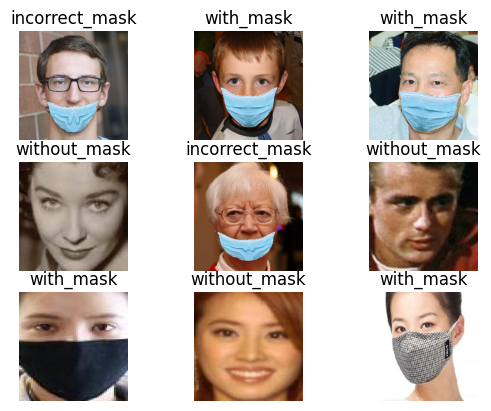

In [33]:
image_batch, labels_batch = data.next()

for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i])
    label = labels_batch[i]
    if np.array_equal(label,np.array([1.,0.,0.])):
        plt.title('incorrect_mask')
    elif np.array_equal(label,np.array([0.,1.,0.])):
        plt.title('with_mask')
    else:
        plt.title('without_mask')
    plt.axis("off")
